# Glass Identification Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv")
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.head()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.tail()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.isnull().sum()

1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1          0
dtype: int64

In [7]:
print("the rows and columns in the dataset:", df.columns)
print("dimensions in the dataset:", df.shape)

the rows and columns in the dataset: Index(['1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75', '0.00',
       '0.00.1', '1'],
      dtype='object')
dimensions in the dataset: (213, 10)


In [8]:
df.dtypes

1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1            int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1.52101  213 non-null    float64
 1   13.64    213 non-null    float64
 2   4.49     213 non-null    float64
 3   1.10     213 non-null    float64
 4   71.78    213 non-null    float64
 5   0.06     213 non-null    float64
 6   8.75     213 non-null    float64
 7   0.00     213 non-null    float64
 8   0.00.1   213 non-null    float64
 9   1        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
type,6


In [16]:
#for checking the value counts in each columns
for i in df.columns:
    print(df[i].value_counts())
    print("/n")

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64
/n
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
/n
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64
/n
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64
/n
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64
/n
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
/n
8.03    5
8.43    5
8.44    4
9.

In [18]:
print("the numbe of duplicate values",df.duplicated().sum())

the numbe of duplicate values 1


# Data Preprocessing (Preparing Dataset)
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

In [10]:
column=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type']
df.columns=column
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [11]:
df.describe()    #statistical analysis

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Ploting the variables of the dataset
to check the relation of variables with each other

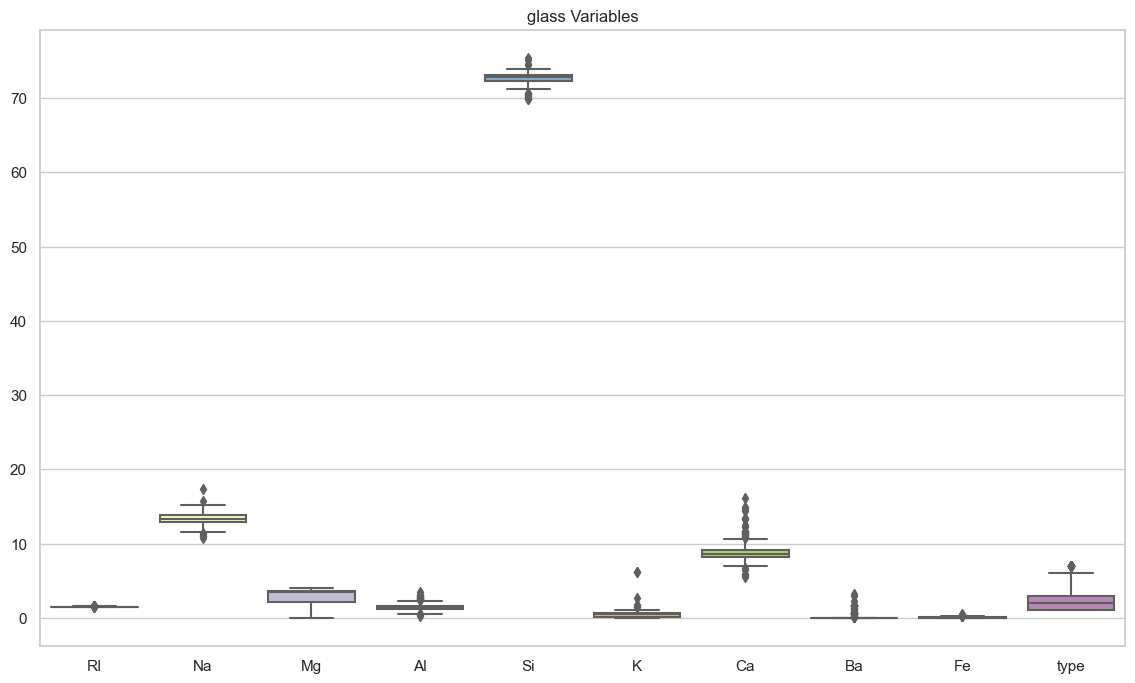

In [12]:
# box plot to show the variation of variables 
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df, palette="Set3")
plt.title('glass Variables')
plt.show()

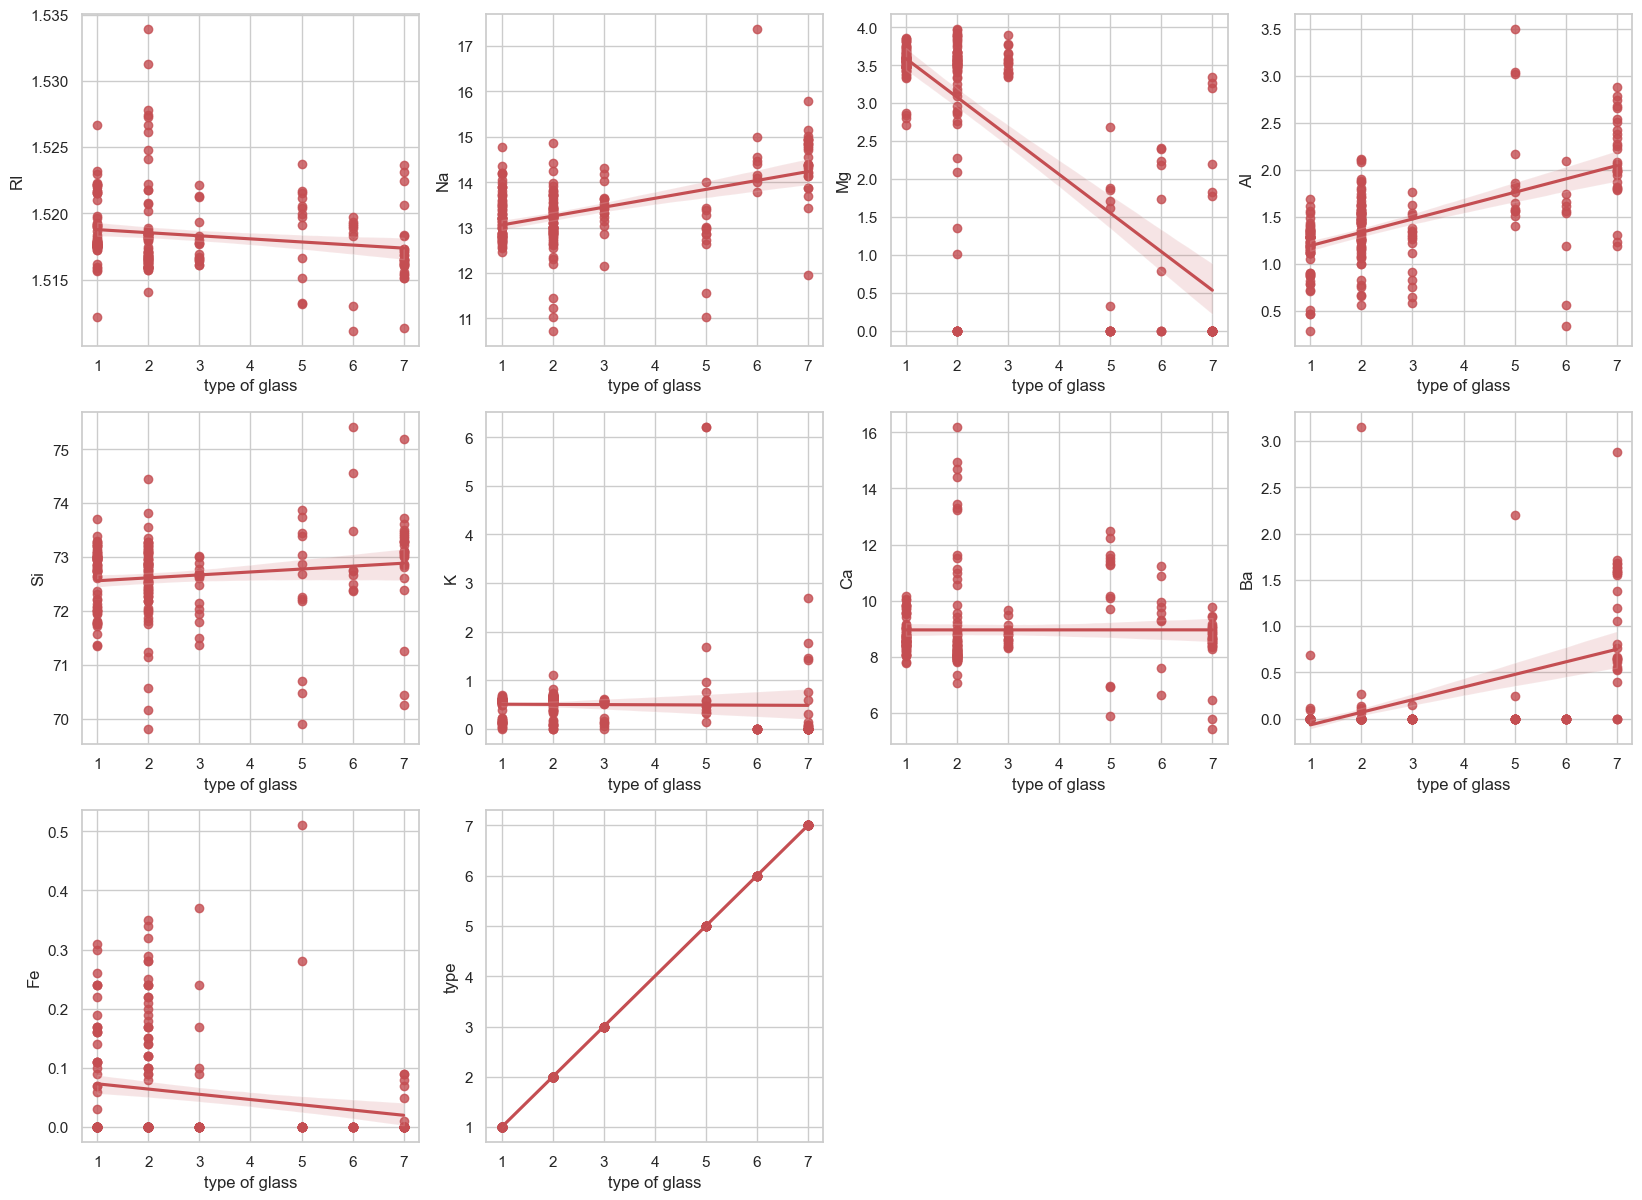

In [13]:
#Regplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<17:
        plt.subplot(5,4,p)
        sns.regplot(x="type",y=i,data=df,color="r")
        plt.xlabel("type of glass")
        plt.ylabel(i)
    p+=1
plt.show()

<Axes: >

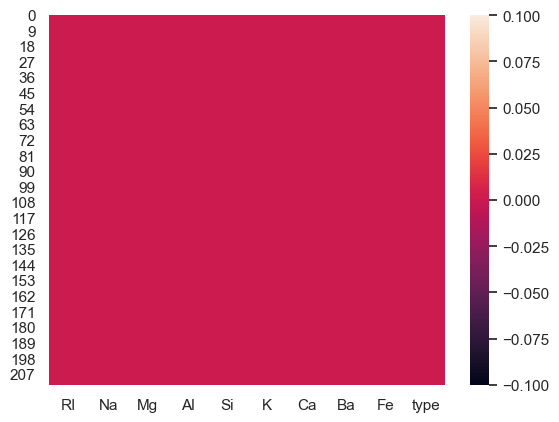

In [14]:
sns.heatmap(df.isnull())

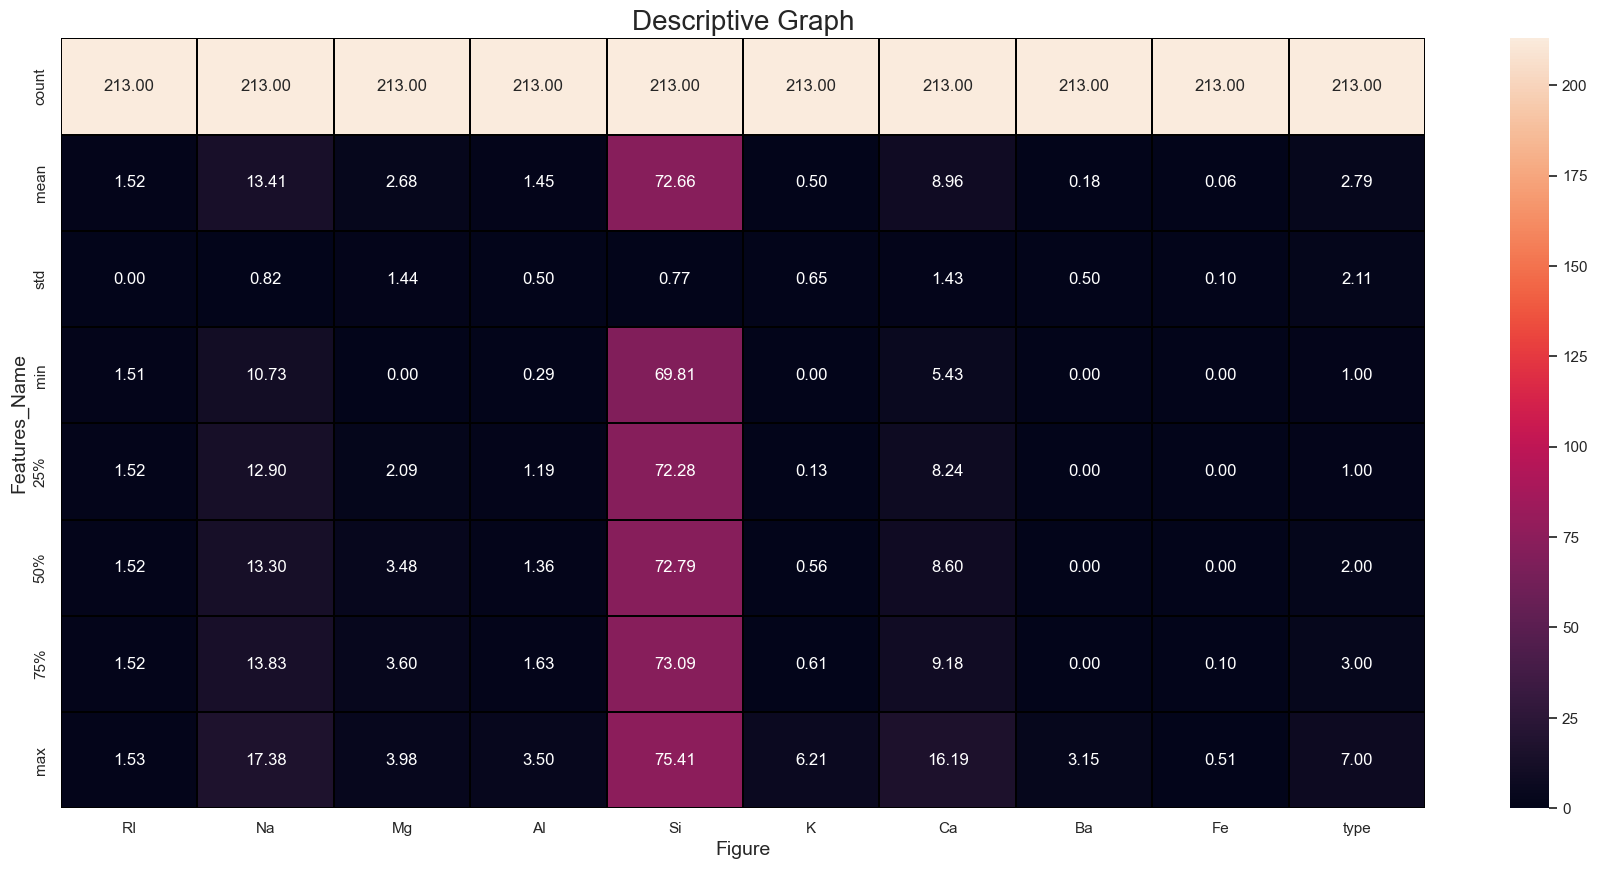

In [19]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor="black")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

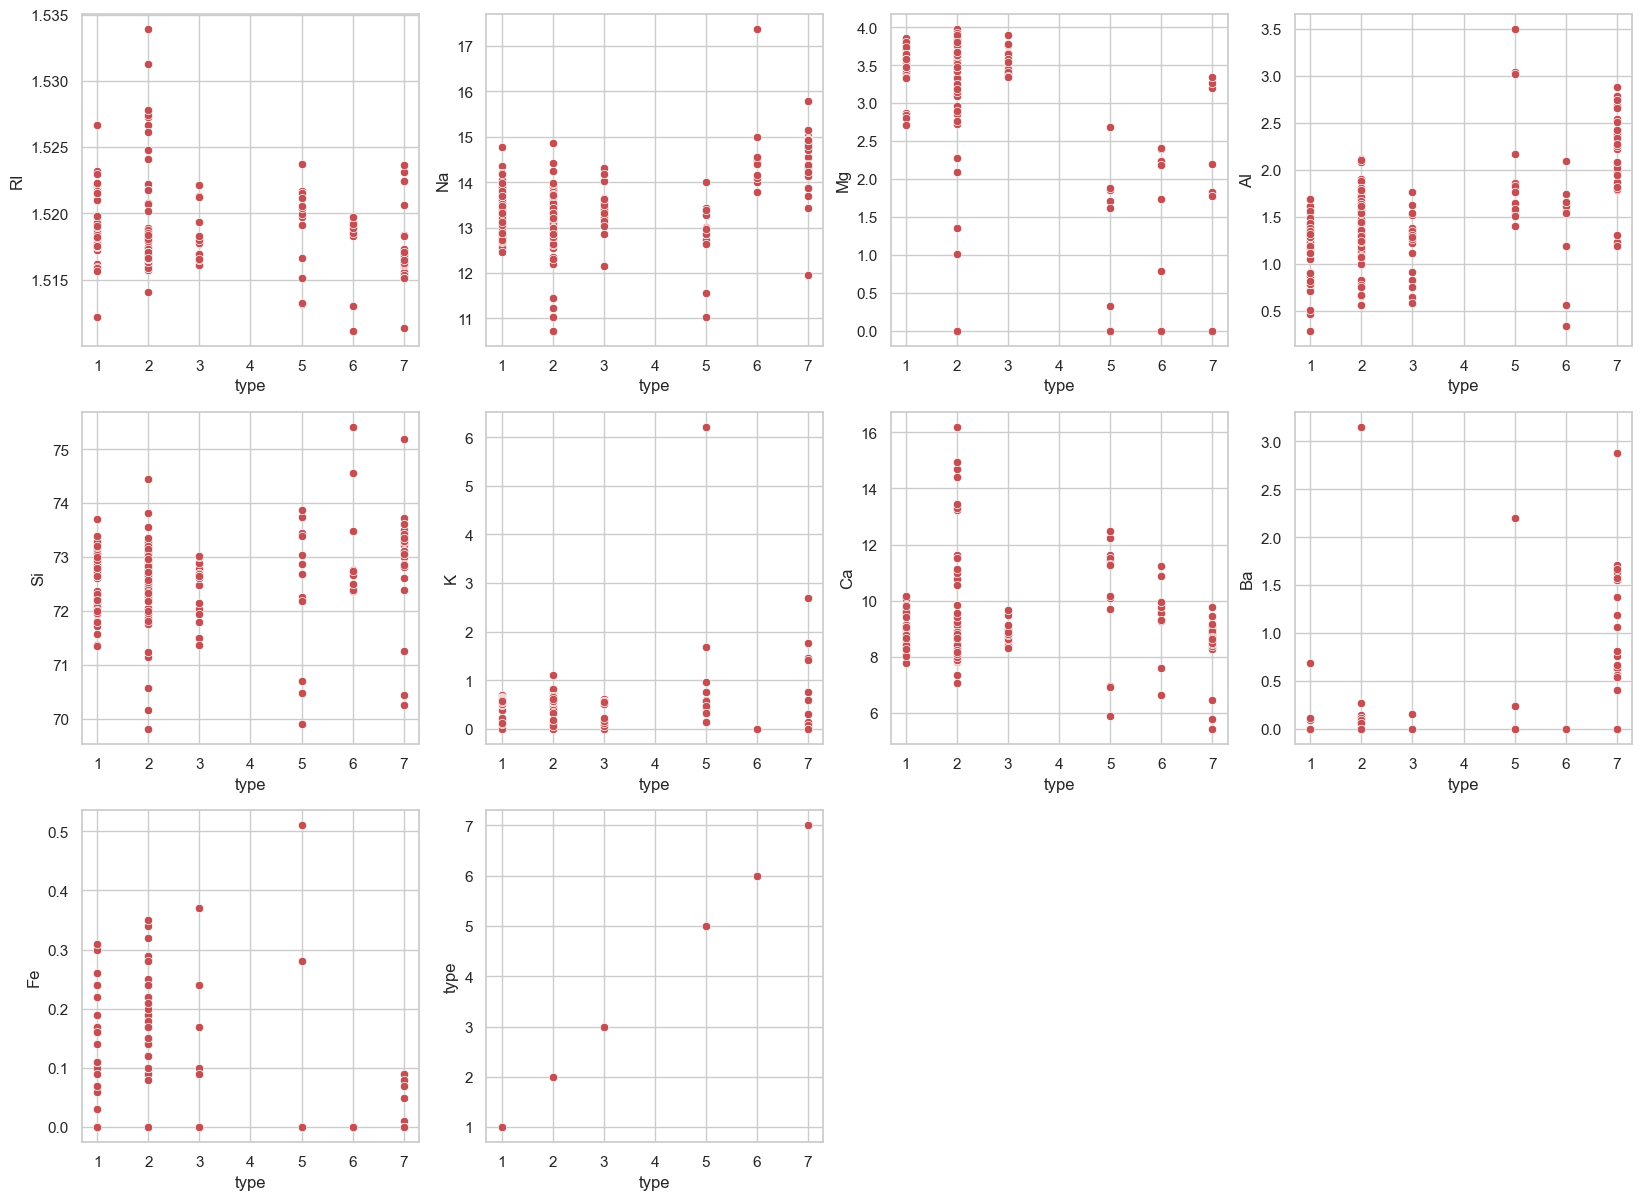

In [20]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="type",y=i,data=df,color="r")
        plt.xlabel("type")
        plt.ylabel(i)
    p+=1
plt.show()

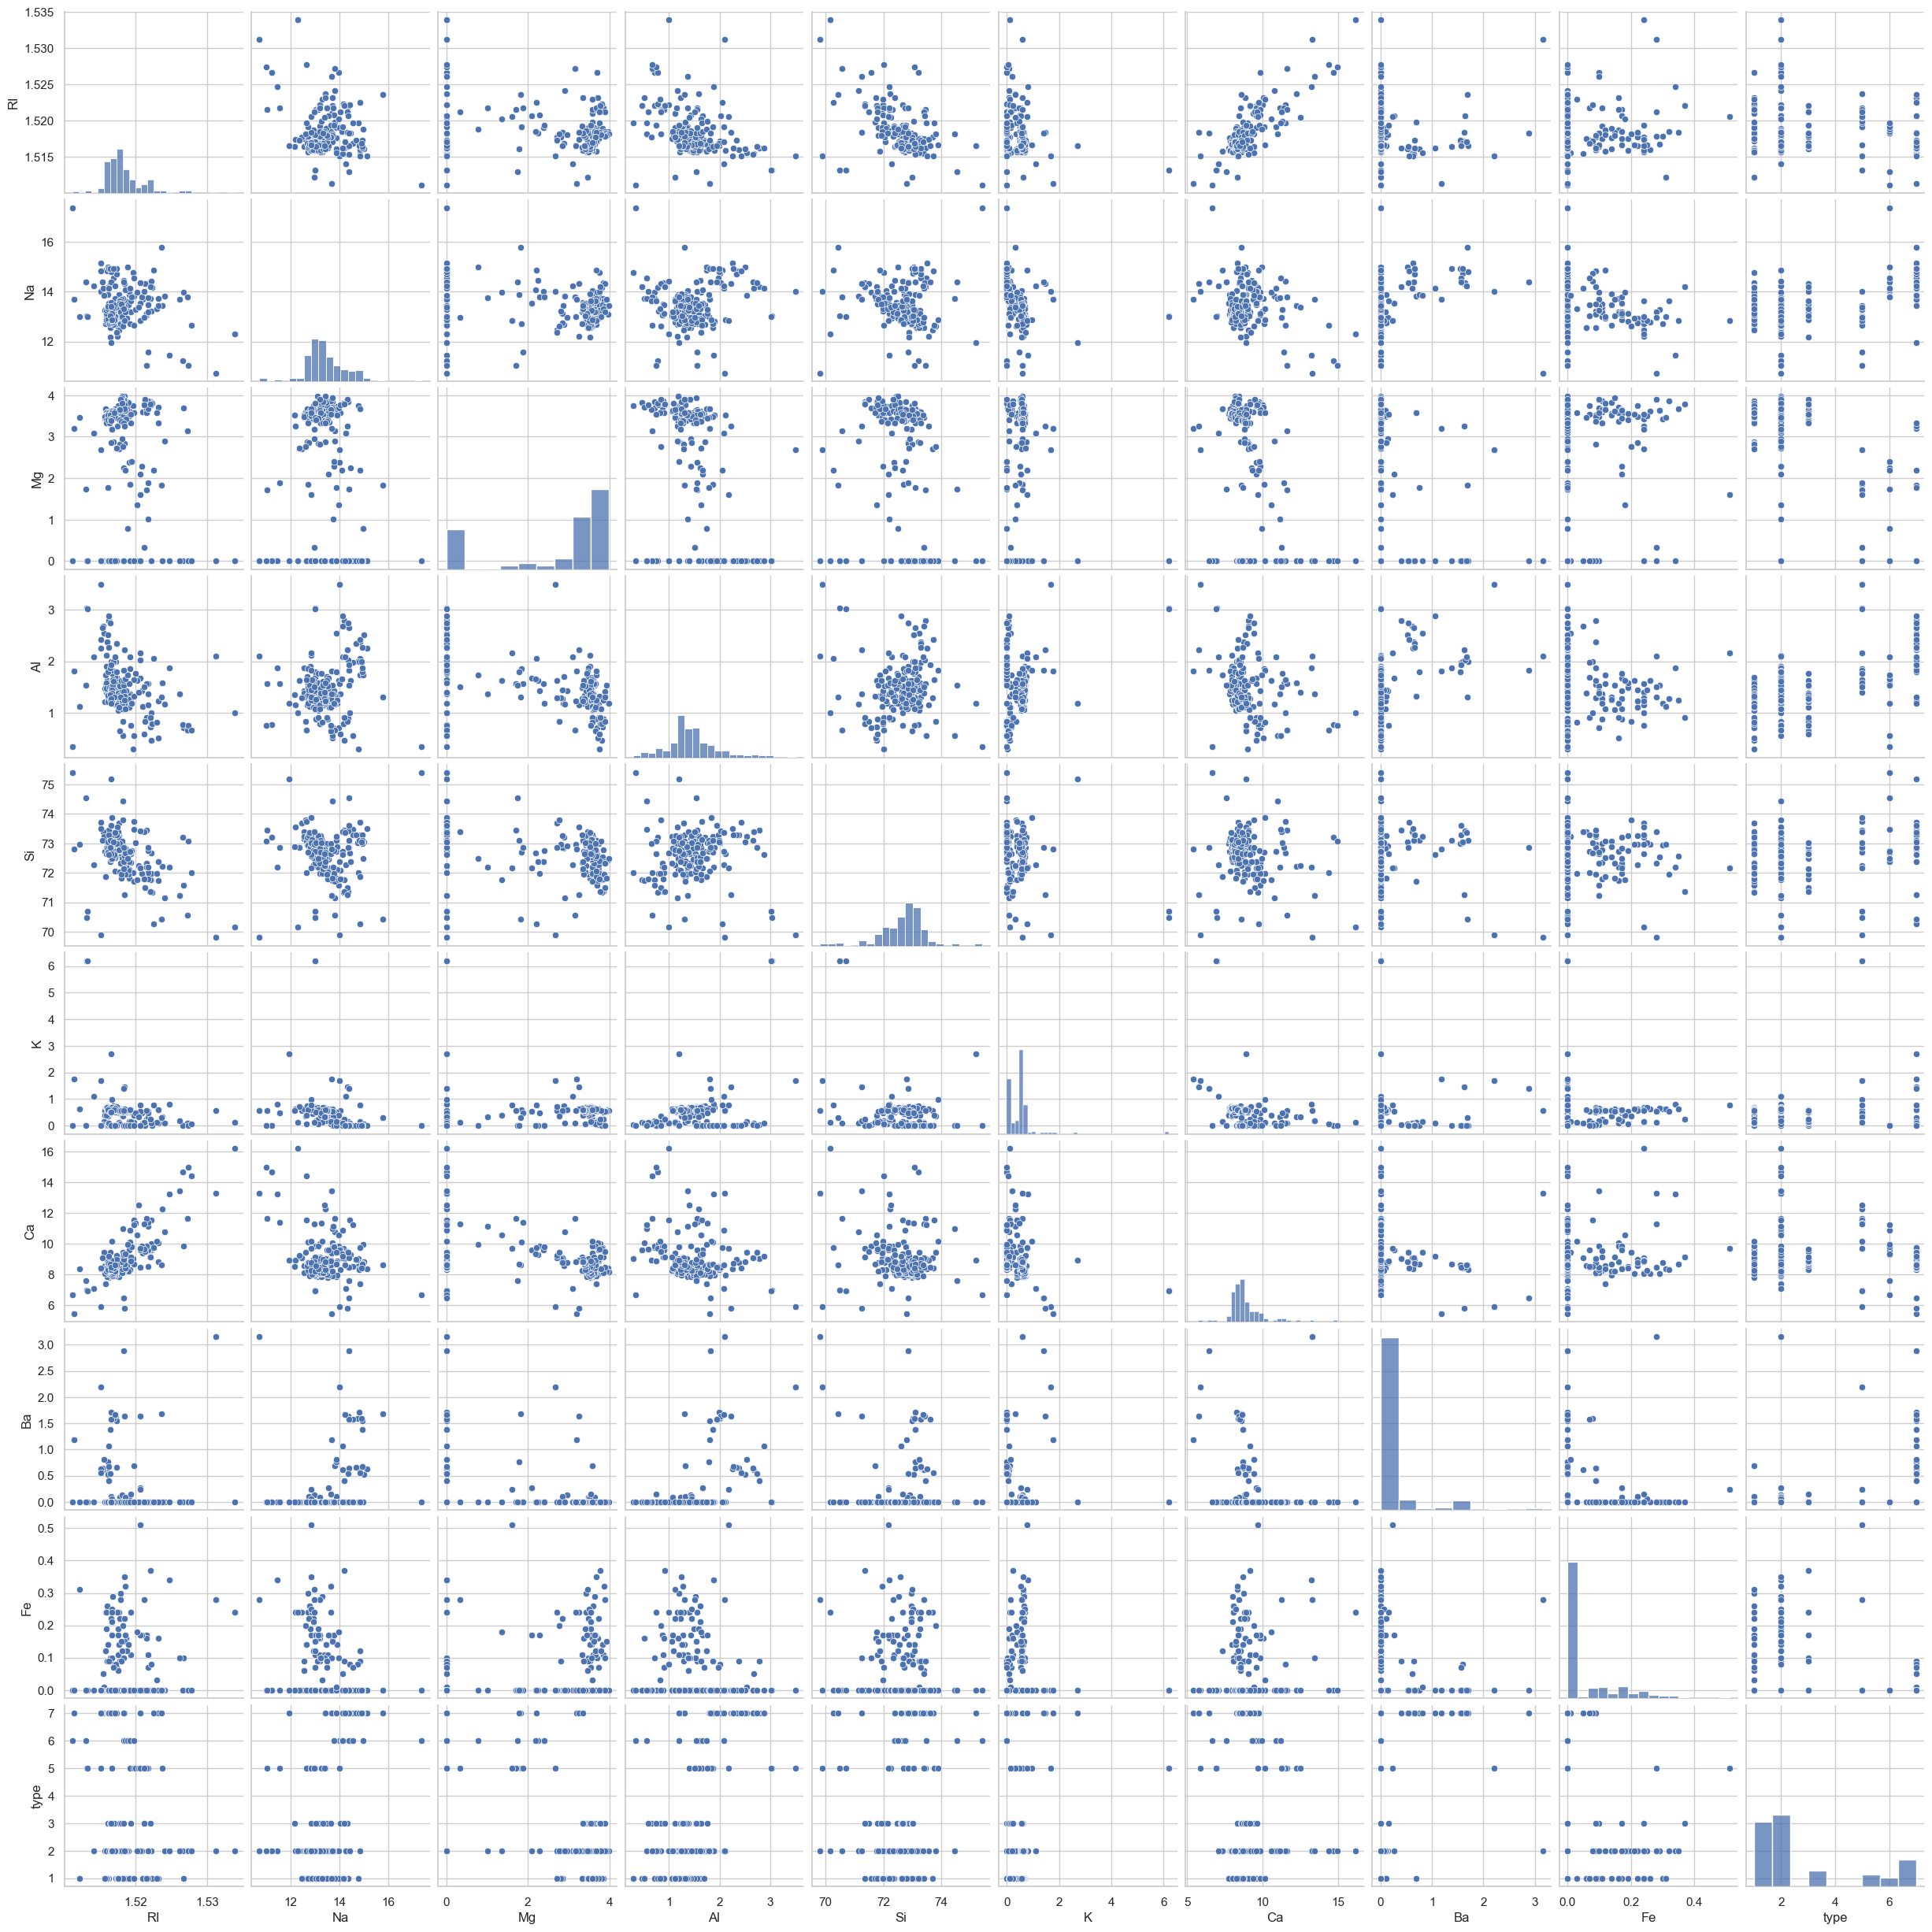

In [21]:
sns.pairplot(data=df,palette="Dark2")

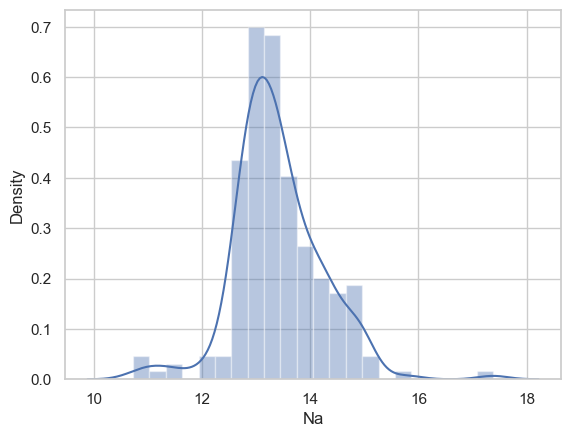

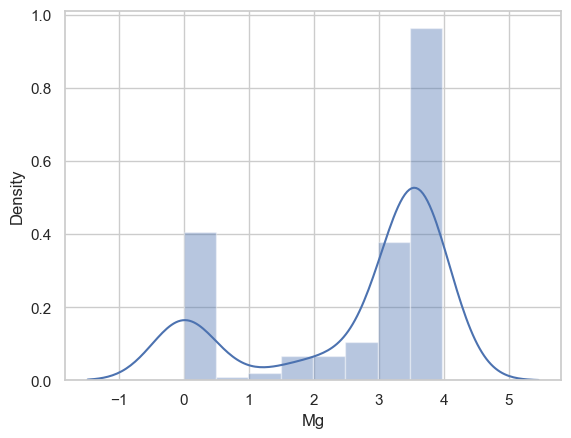

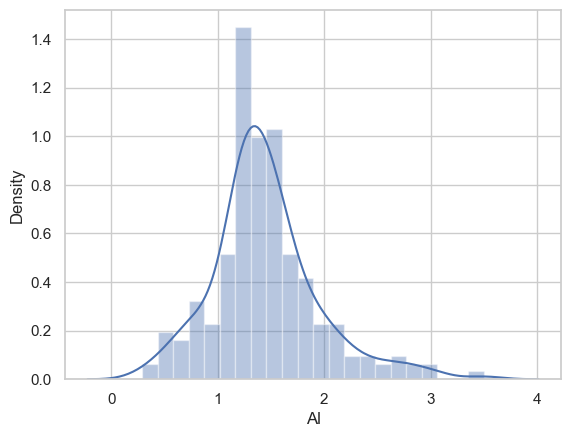

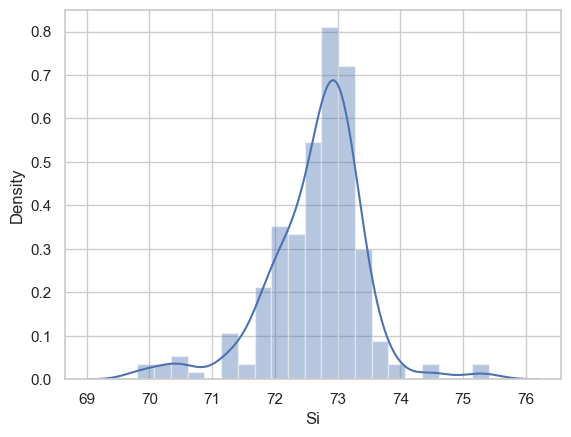

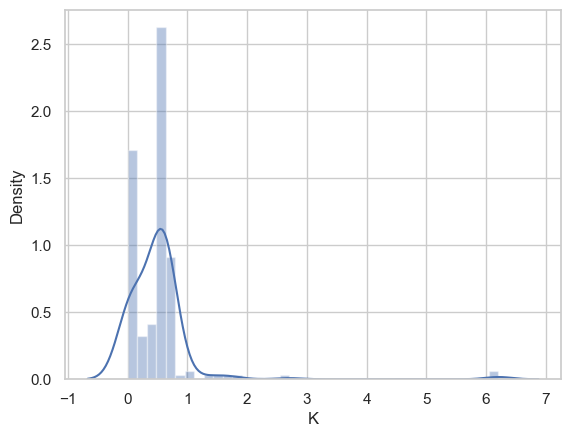

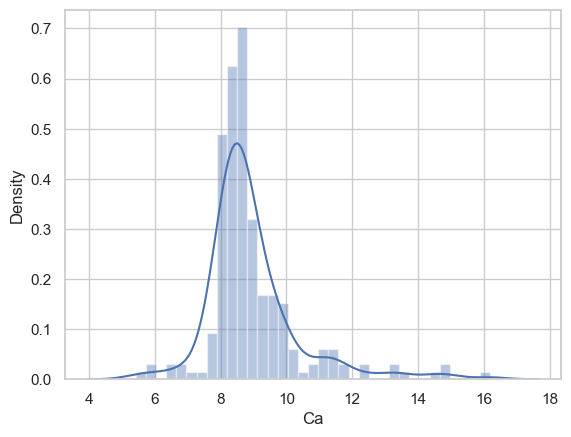

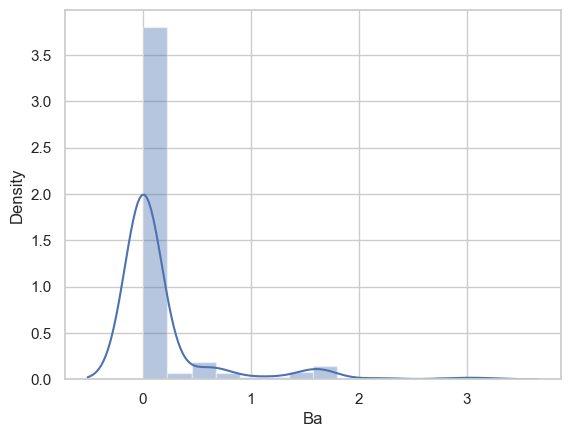

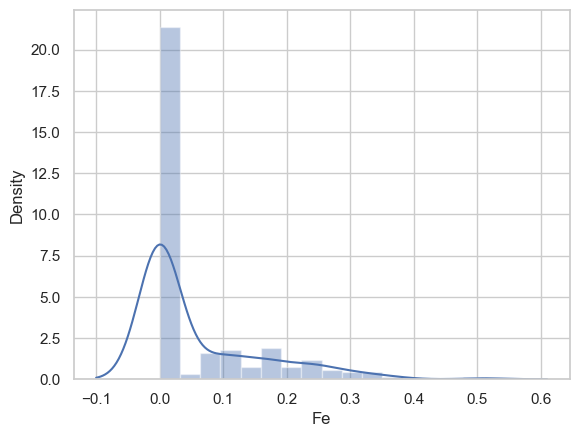

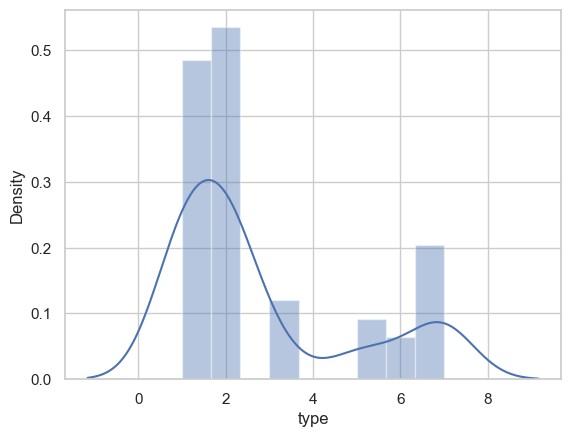

In [26]:
for i in range(1,10):
        sns.distplot(df.iloc[:,i])
        plt.xlabel(df.columns[i])
        plt.show()

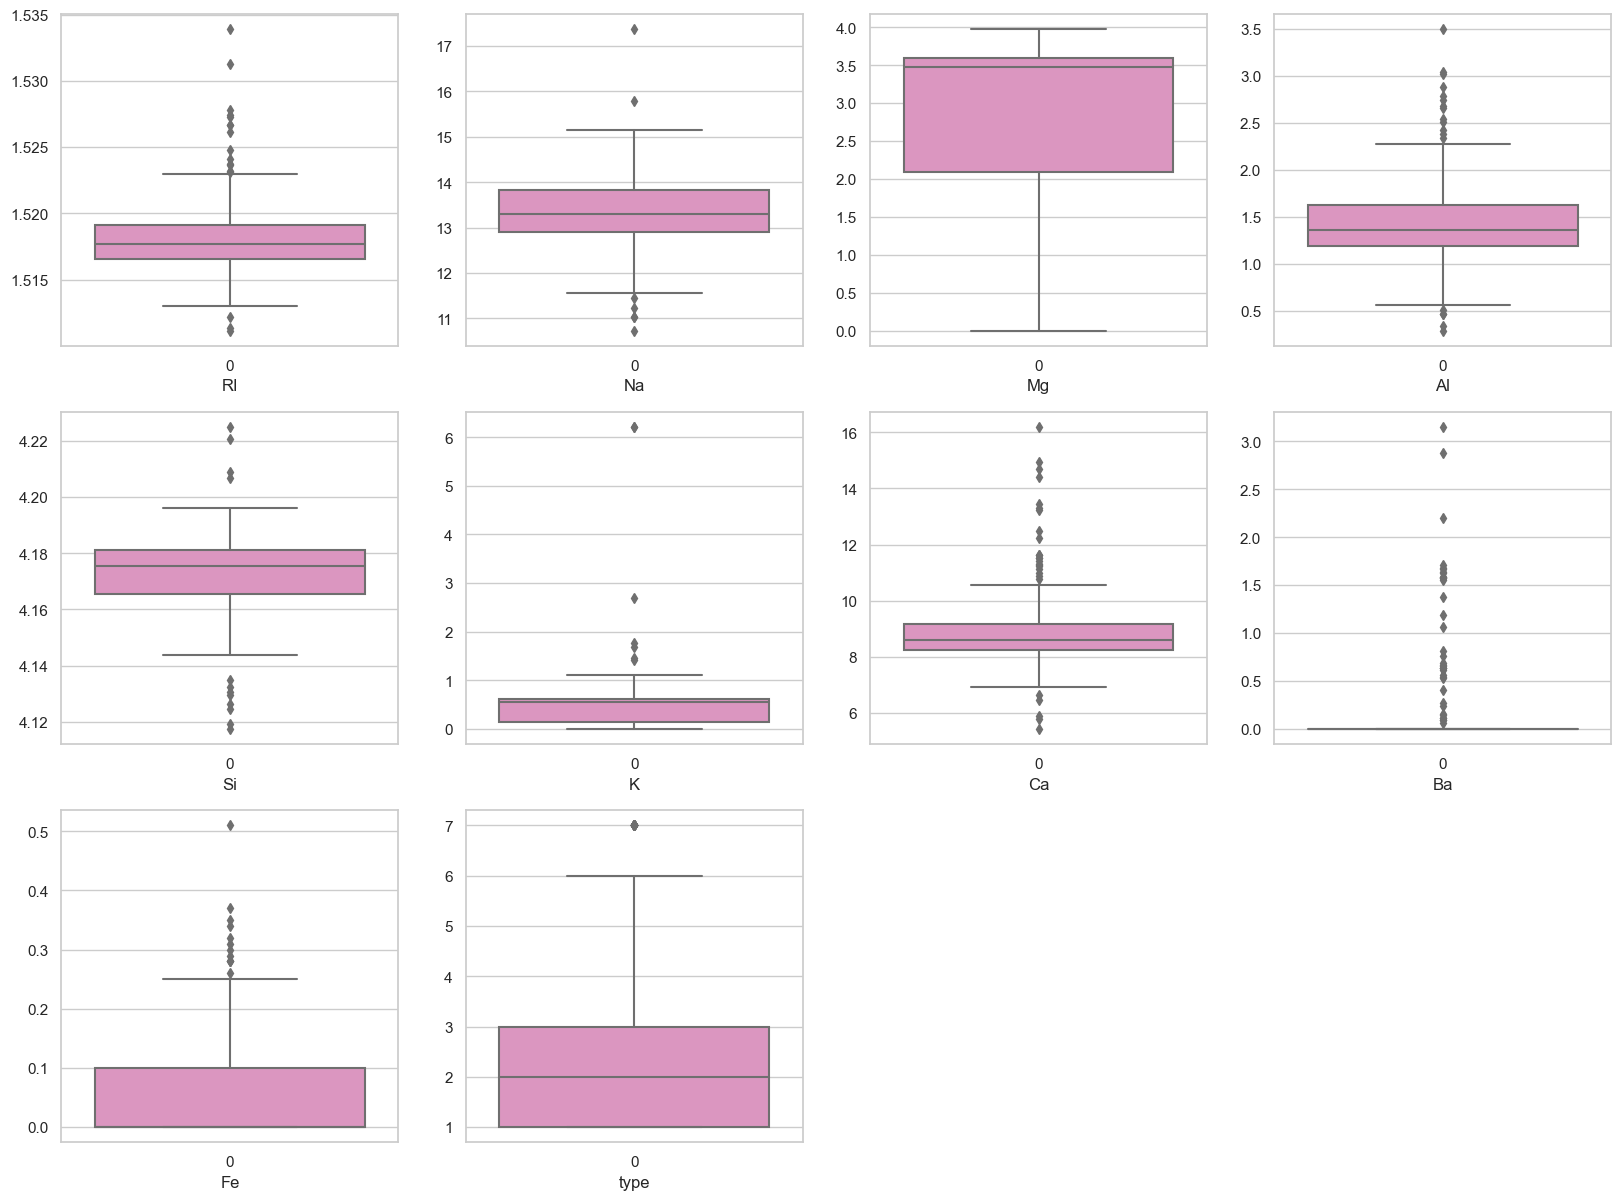

In [35]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()
        

In [36]:
from scipy.stats import zscore
out_features=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','type']]
z=np.abs(zscore(out_features))    #
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,0.245101,0.591880,0.642937,0.173500,0.100338,0.029329,0.792599,0.353808,0.588301,0.851703
1,0.716826,0.150946,0.608144,0.187433,0.435464,0.167472,0.827734,0.353808,0.588301,0.851703
2,0.228607,0.240996,0.705564,0.313863,0.054604,0.108813,0.518546,0.353808,0.588301,0.851703
3,0.307777,0.167507,0.656854,0.414122,0.551284,0.078115,0.623951,0.353808,0.588301,0.851703
4,0.789399,0.755419,0.649895,0.347848,0.409713,0.216258,0.623951,0.353808,2.082200,0.851703
...,...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.054604,0.643296,0.156046,1.778672,0.588301,2.005192
209,0.495808,1.853443,1.862164,1.089766,0.525554,0.766090,0.392060,2.844912,0.588301,2.005192
210,0.757727,1.167545,1.862164,1.149921,0.987968,0.766090,0.363952,2.945501,0.588301,2.005192
211,0.607966,1.192041,1.862164,0.989506,1.231411,0.766090,0.335844,2.804676,0.588301,2.005192


In [37]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [38]:
df1=df[(z<3).all(axis=1)]
df1.shape

(193, 10)

In [39]:
print("old dataframe: ",df.shape[0])
print("new dataframe: ",df1.shape[0])

old dataframe:  213
new dataframe:  193


In [40]:
print("data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage: 9.389671361502346


In [41]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.51761,13.89,3.60,1.36,4.174180,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,4.179148,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,4.171883,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,4.180865,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,4.178767,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,4.176475,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,4.171883,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,4.180484,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,4.187339,0.00,8.44,1.64,0.00,7


# Checking
how the data has been distributed in each column

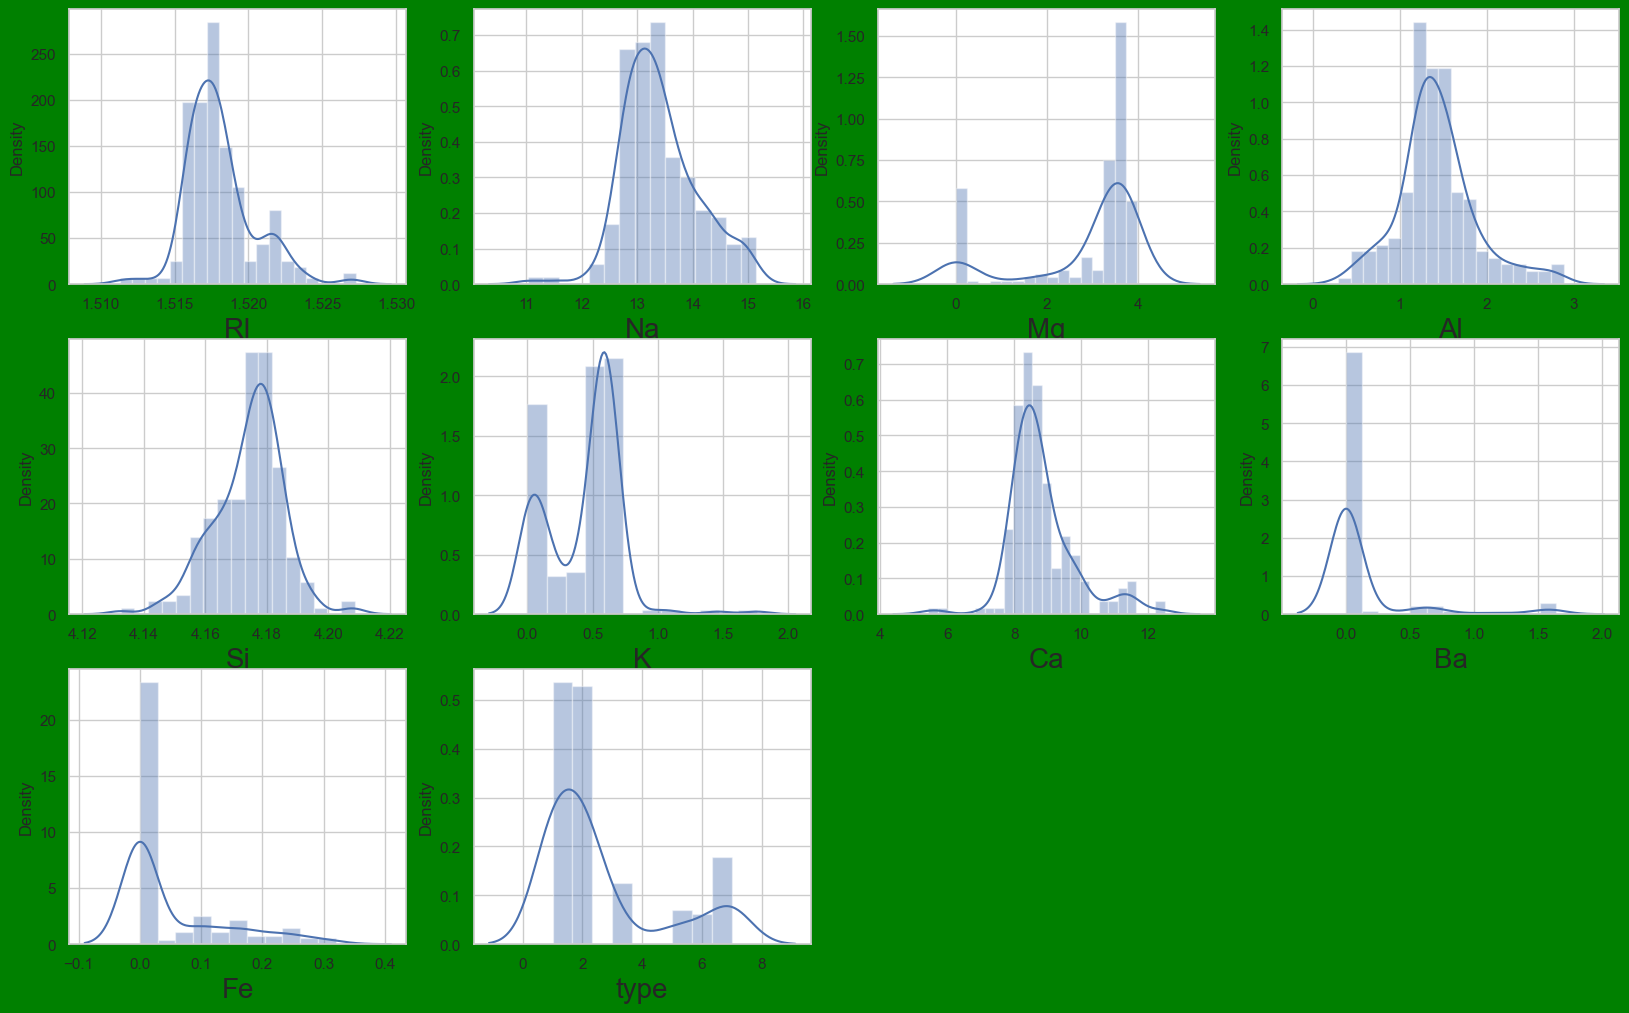

In [42]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
df.skew()

RI      1.639658
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.791299
K       6.549276
Ca      2.040591
Ba      3.406749
Fe      1.747173
type    1.108861
dtype: float64

# Correlation between target variable and independent variable

In [46]:
df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
RI,1.000000,0.048762,0.040224,-0.520285,-0.606014,-0.362609,0.694174,-0.191584,-0.016095,-0.162981
Na,0.048762,1.000000,-0.491934,0.254805,-0.234473,-0.612858,0.020123,0.532913,-0.209057,0.535440
Mg,0.040224,-0.491934,1.000000,-0.591948,-0.370184,0.495241,-0.456909,-0.586867,0.138597,-0.809747
Al,-0.520285,0.254805,-0.591948,1.000000,0.332427,0.000847,-0.213887,0.531651,-0.120321,0.659242
Si,-0.606014,-0.234473,-0.370184,0.332427,1.000000,0.063462,-0.168606,0.152785,0.018605,0.257096
K,-0.362609,-0.612858,0.495241,0.000847,0.063462,1.000000,-0.503380,-0.257401,0.095794,-0.391378
Ca,0.694174,0.020123,-0.456909,-0.213887,-0.168606,-0.503380,1.000000,-0.168033,-0.011883,0.154708
Ba,-0.191584,0.532913,-0.586867,0.531651,0.152785,-0.257401,-0.168033,1.000000,-0.121189,0.682676
Fe,-0.016095,-0.209057,0.138597,-0.120321,0.018605,0.095794,-0.011883,-0.121189,1.000000,-0.205058
type,-0.162981,0.535440,-0.809747,0.659242,0.257096,-0.391378,0.154708,0.682676,-0.205058,1.000000


<Axes: >

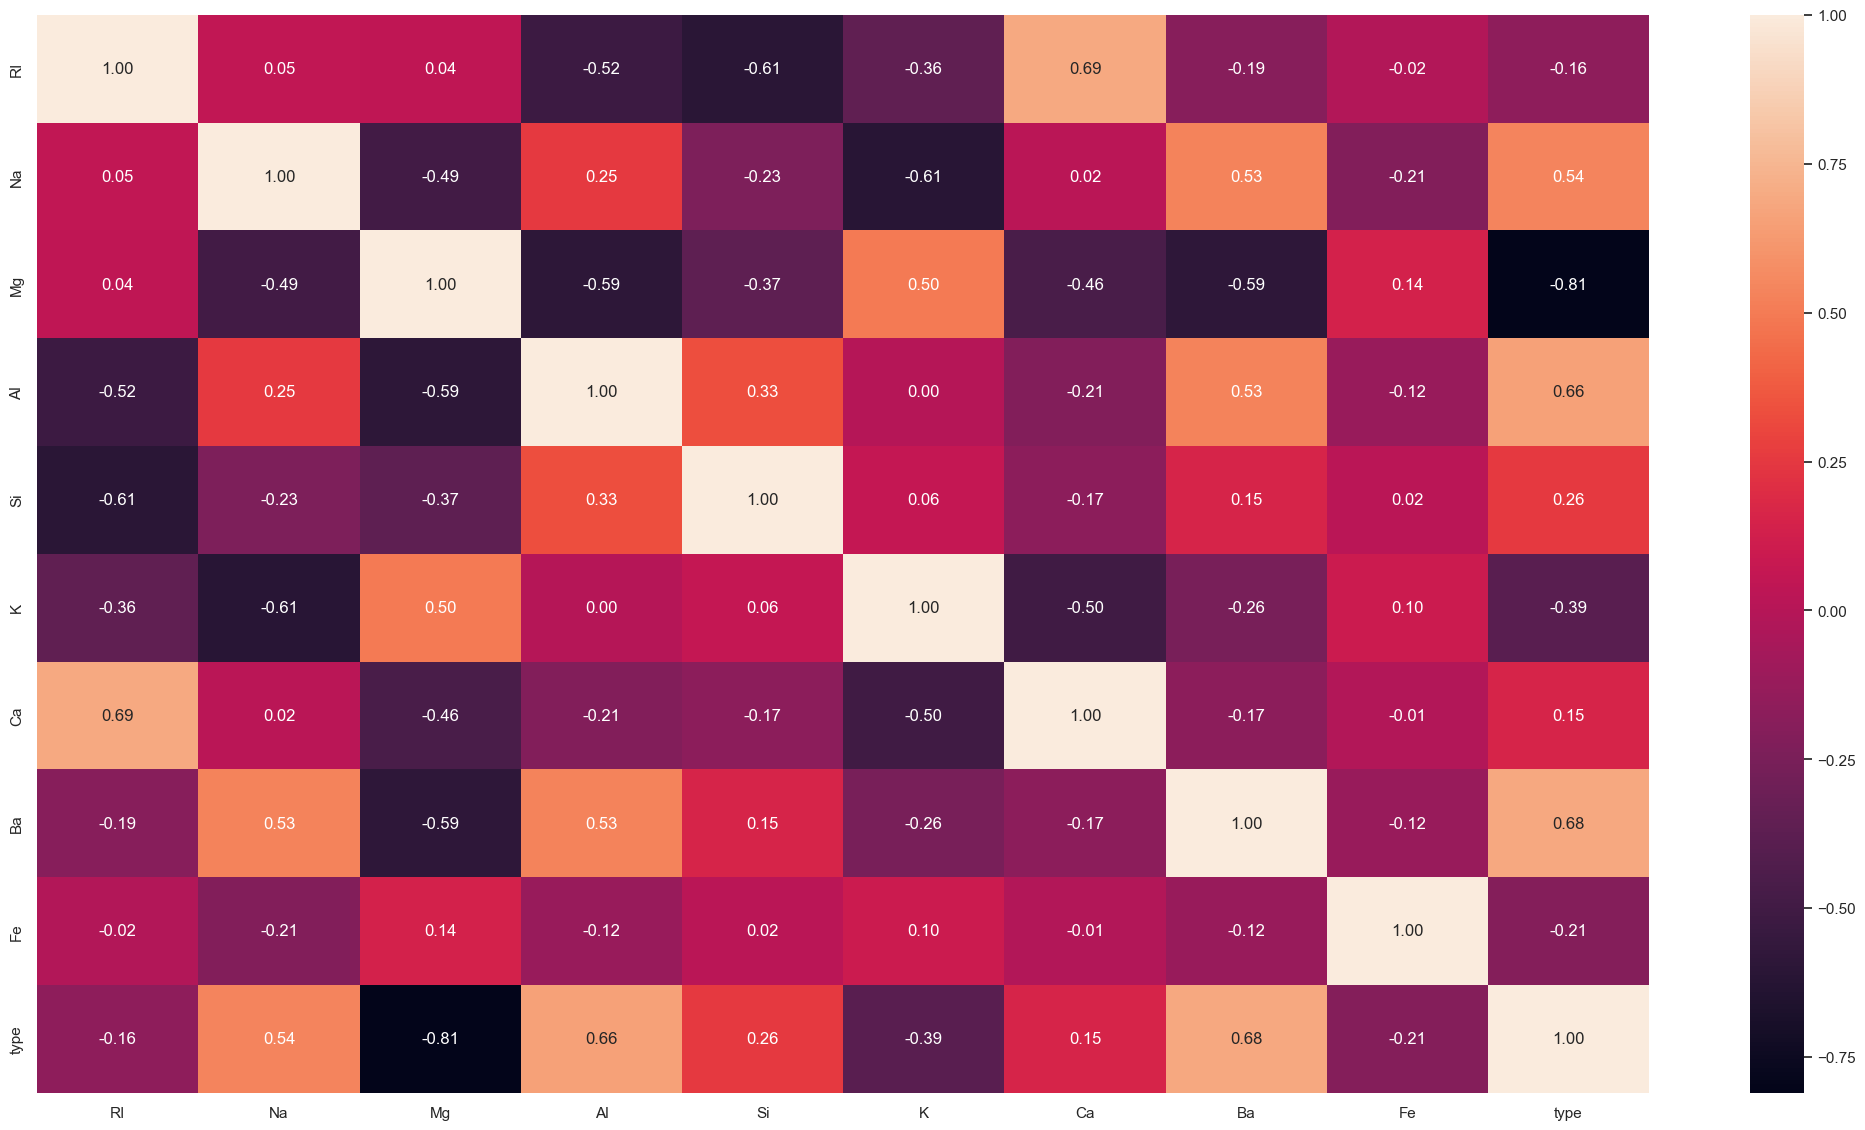

In [47]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f')

In [49]:
df.corr().type.sort_values()

Mg     -0.744004
Fe     -0.191090
RI     -0.161322
K      -0.012765
Ca      0.000372
Si      0.144897
Na      0.504983
Ba      0.574896
Al      0.597754
type    1.000000
Name: type, dtype: float64

In [51]:
#Featuring the x and y
x=df1.drop(['type'],axis=1)
y=df1['type']
print("feature dimensions",x.shape)
print("label dimension",y.shape)

feature dimensions (193, 9)
label dimension (193,)


In [52]:
#Feature Scaling using Standard Scalarisation
# for the evaluation of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.191475,0.704498,0.558738,-0.145324,0.010415,0.165576,-1.005952,-0.347296,-0.605187
1,-0.819092,0.169658,0.520382,0.260836,0.456906,-0.154697,-1.056501,-0.347296,-0.605187
2,-0.169531,-0.305754,0.627781,-0.303276,-0.196017,0.485849,-0.611669,-0.347296,-0.605187
3,-0.274865,-0.216615,0.574081,-0.416098,0.611214,0.414677,-0.763316,-0.347296,-0.605187
4,-0.915648,-0.929734,0.566410,0.441351,0.422598,0.734950,-0.763316,-0.347296,2.428607
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.202957,2.968571,0.216620,-1.542547,0.631836,1.165248,-0.605187
189,-0.797147,1.075914,-2.202957,3.284473,-0.196017,-1.257860,0.358872,2.621773,-0.605187
190,-0.525034,2.234732,-2.202957,1.276236,0.576934,-1.542547,-0.429693,4.106307,-0.605187
191,1.142758,1.402760,-2.202957,1.343930,1.193013,-1.542547,-0.389254,4.246358,-0.605187


In [53]:
#Checking Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,5.595525,RI
1,44.583433,Na
2,171.246238,Mg
3,20.945045,Al
4,34.111652,Si
5,11.309308,K
6,104.974809,Ca
7,14.090631,Ba
8,1.106409,Fe


In [56]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [57]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.8558534544350791 on Random state 33


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxrs)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [60]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_LR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score:  0.8558534544350791
R2 score on training data:  68.93943969488573
Mean Absolute Error 0.6701215137343681
Mean Squared Error 0.7327735064523523
Root mean squared Error 0.856021907694162


In [61]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8908181626805449
R2 score on training data:  95.91445004083855
Mean Absolute Error 0.4332758620689655
Mean Squared Error 0.5550293103448276
Root mean squared Error 0.7450028928432612


In [62]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.8253996842289925
R2 score on training data:  80.62619112442145
Mean Absolute Error 0.5413793103448276
Mean Squared Error 0.8875862068965518
Root mean squared Error 0.9421179368298598


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_GBR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score:  0.895632580489065
R2 score on training data:  99.09157063727382
Mean Absolute Error 0.45341223979523826
Mean Squared Error 0.5305550657123954
Root mean squared Error 0.7283921098641826


In [64]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error',mean_squared_error(y_test,pred_ls))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 score:  0.2972093822790106
R2 score on training data:  26.592136255839115
Mean Absolute Error 1.4470371511546234
Mean Squared Error 3.572658250192223
Root mean squared Error 1.8901476794664016


In [65]:
from sklearn.tree import DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.8880767206596105
R2 score on training data:  100.0
Mean Absolute Error 0.29310344827586204
Mean Squared Error 0.5689655172413793
Root mean squared Error 0.7542980294561158


In [66]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=dtr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_svr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.8880767206596105
R2 score on training data:  83.42106962701735
Mean Absolute Error 0.29310344827586204
Mean Squared Error 0.5689655172413793
Root mean squared Error 0.7542980294561158


In [67]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.9070931641424478
R2 score on training data:  100.0
Mean Absolute Error 0.42120689655172405
Mean Squared Error 0.47229482758620694
Root mean squared Error 0.7542980294561158


In [68]:
#cross validation score 
from sklearn.model_selection import cross_val_score
score =cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_LR)-score.mean())*100)

[  0.          -3.22881076   0.          -2.20160094 -28.62913999]
-6.811910336537467
Difference between R2 score and cross validation score:  766.7763790972547


In [69]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[  0.          -7.08319778   0.          -3.3342104  -25.00631018]
-7.084743670962571
Difference between R2 score and cross validation score:  797.5561833643117


In [70]:
 score2 =cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_knn)-score2.mean())*100)

[  0.          -2.39733333   0.          -2.12089109 -32.83031674]
-7.469708232904736
Difference between R2 score and cross validation score:  829.5107917133729


In [71]:
score3 =cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[  0.          -5.60522652   0.          -3.8394788  -28.36077907]
-7.561096877950838
Difference between R2 score and cross validation score:  770.7542917026532


In [72]:
score4 =cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_ls)-score4.mean())*100)

[  0.          -9.79420307   0.          -0.26563234 -36.45741738]
-9.303450557451047
Difference between R2 score and cross validation score:  960.0659939730058


In [ ]:
score6 =cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_dtr)-score6.mean())*100)

In [ ]:
score7 =cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_svr)-score7.mean())*100)

In [ ]:
score8 =cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_etr)-score8.mean())*100)

In [81]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV
param = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [1, 4, 10, 20]
}
etr = ExtraTreesRegressor()

# Create GridSearchCV instance
gscv = GridSearchCV(estimator=etr, param_grid=param, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
gscv.fit(x_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)



Best Parameters:  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 10}
Best Score:  -0.9422548148148149


In [82]:
gscv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [85]:
Model = ExtraTreesRegressor(
    n_estimators=100,
    max_features='auto',
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=1)

In [86]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))      

r2_score:  0.8874085725980937
Mean Absolute error: 0.4989655172413793
Mean Squared error: 0.5723620689655171
Root Mean Squared Error:  0.75654614463727


In [87]:
import joblib
#joblib.dump(Model,"glass.pkl")

In [89]:
import pickle
filename='glass.pkl'
pickle.dump(Model,open(filename,'wb'))

In [90]:
import pickle 
loaded_model=pickle.load(open('glass.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.74085725980937


In [91]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
Predicted,1.65,6.97,1.44,2.34,1.38,6.82,1.13,2.37,1.41,1.69,...,6.65,1.08,4.72,1.99,2.07,6.83,4.77,6.82,1.53,1.17
original,2.00,7.00,3.00,1.00,2.00,7.00,1.00,3.00,1.00,1.00,...,7.00,1.00,5.00,2.00,2.00,7.00,5.00,7.00,1.00,1.00
